# Meke Sample Data

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Lorentz equation

The Lorentz equation is one of the non-linear ordinary differential equations that exhibit chaotic behavior. \
3D position's data are stored as `lorentz.csv`.

|  t   |  x | y | z | x_err | y_err | z_err |
| ---- | ---- | ---- | ---- | ---- | ---- | ---- |

`*_err` is results which has small error in initial condition.


In [54]:
class EqLorentz:
    def __init__(self) -> None:
        self.init_x, self.init_y, self.init_z = 1, 1, 1  # initial position
        self.s, self.r, self.b = 10, 28, 8/3  # hyper params
        self.args = (self.s, self.r, self.b)
        self.t0 = 0  # initial time step
        self.tf = 100  # terminal time step
        self.t_span = (self.t0, self.tf)
        self.dt = 0.01  # [sec] 1 step time 
        self.t = np.arange(self.t0, self.tf, self.dt)  # times
        self.y0 = np.array([self.init_x, self.init_y, self.init_z])

    def lorenz_ode(self, t: np.ndarray, arr_xyz: np.ndarray, ss: float, rr: float, bb: float) -> np.ndarray:
        x, y, z = arr_xyz
        s, r, b = ss, rr, bb
        dxdt = -s * (x-y)
        dydt = -x*z + r*x -y
        dzdt = x*y - b*z
        return np.array([dxdt, dydt, dzdt])

    def solve(self):
        self.solver = solve_ivp(
            fun=self.lorenz_ode, t_span=self.t_span, y0=self.y0, method='RK45',
            t_eval=self.t, dense_output=True, args=self.args
        )
        return self.solver.y

    def solve_with_small_error(self):
        """If initial condition has error in position z, how chage the result? Let's see."""
        self.y0 = np.array([self.init_x, self.init_y, self.init_z * 1.01])
        self.solver = solve_ivp(
            fun=self.lorenz_ode, t_span=self.t_span, y0=self.y0, method='RK45',
            t_eval=self.t, dense_output=True, args=self.args
        )
        return self.solver.y



In [55]:
# solve
eq_lorentz = EqLorentz()
xyz = eq_lorentz.solve()
xyz_err = eq_lorentz.solve_with_small_error()
data = np.vstack([eq_lorentz.t, xyz, xyz_err])
df_xyz = pd.DataFrame(data.T, columns=["t", "x", "y", "z", "x_err", "y_err", "z_err"])
df_xyz = df_xyz.round(decimals=6)
df_xyz.to_csv("lorentz.csv")

Text(0.5, 0.92, 'Lorentz')

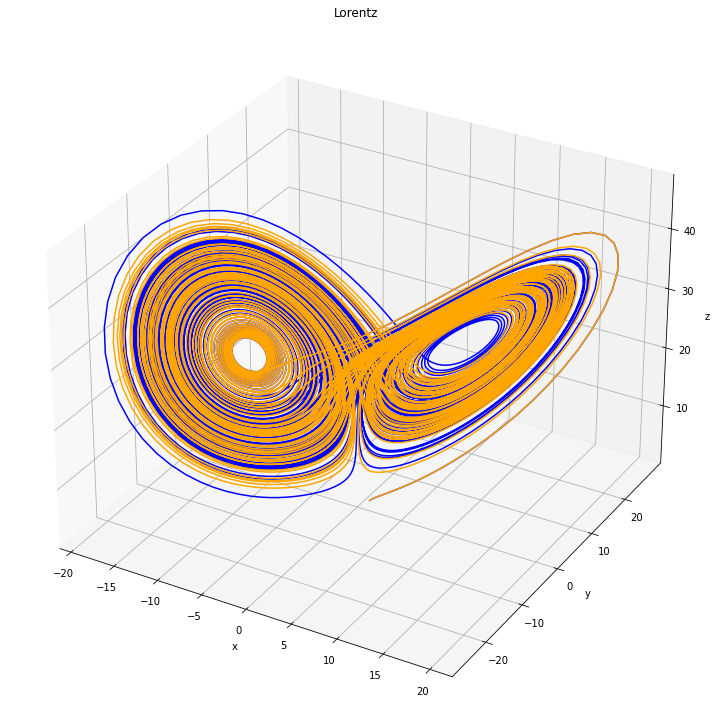

In [57]:
# draw
fig3d = plt.figure(figsize=(10, 10))
ax3d = fig3d.add_subplot(111, projection='3d')
ax3d.plot(df_xyz["x"], df_xyz["y"], df_xyz["z"], label="true", color="blue")
ax3d.plot(df_xyz["x_err"], df_xyz["y_err"], df_xyz["z_err"], label="error", color="orange")
ax3d.set_xlabel('x')
ax3d.set_ylabel('y')
ax3d.set_zlabel('z')
fig3d.tight_layout()
plt.title("Lorentz")